In [102]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import Image

## Define dirtiness threshold

In [103]:
THRESHOLD = 0.15
DIRTY_HAND_IMAGE = ['hands.jpg', 'hands3.jpg', 'hands4.jpg']
CLEAN_HAND_IMAGE = ['hands_clean.jpg', 'hands_clean2.jpg']

## Subtract background

In [104]:
img = cv2.imread(CLEAN_HAND_IMAGE[1])
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

height, width, channels = img.shape
rect = (0,0,width-1,height-1)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

cv2.imwrite('hands_no_bg.jpg',img)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite('res_orig.jpg',grayscaled)

True

## Extract Green Channel

In [105]:
img = cv2.imread('hands_no_bg.jpg')

g = img.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

## Perform CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [106]:
grayscaled = cv2.cvtColor(g,cv2.COLOR_BGR2GRAY)
# equ = cv2.equalizeHist(grayscaled)
# cv2.imwrite('res.png',equ)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayscaled)

cv2.imwrite('res.jpg',cl1)

True

## Extract germs from image based from threshold

In [107]:
img = cv2.imread('res.jpg')
cv2.imwrite('res_orig.jpg',img)

grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayscaled, 80, 255, cv2.THRESH_BINARY)
cv2.imwrite('res_threshold.jpg',threshold)
# cv2.imshow('original',img)
# cv2.imshow('Binary threshold',threshold)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

## Original image (before processing)

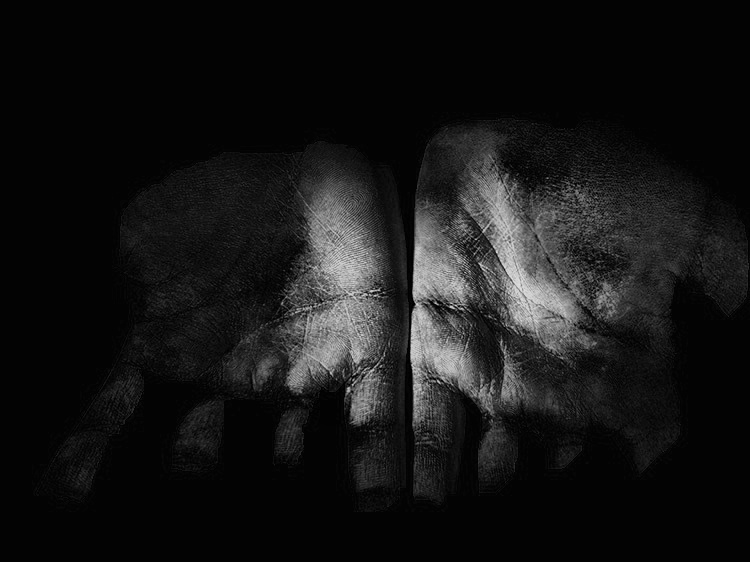

In [108]:
Image(filename='res_orig.jpg') 

## Extracted germs from Image Processing

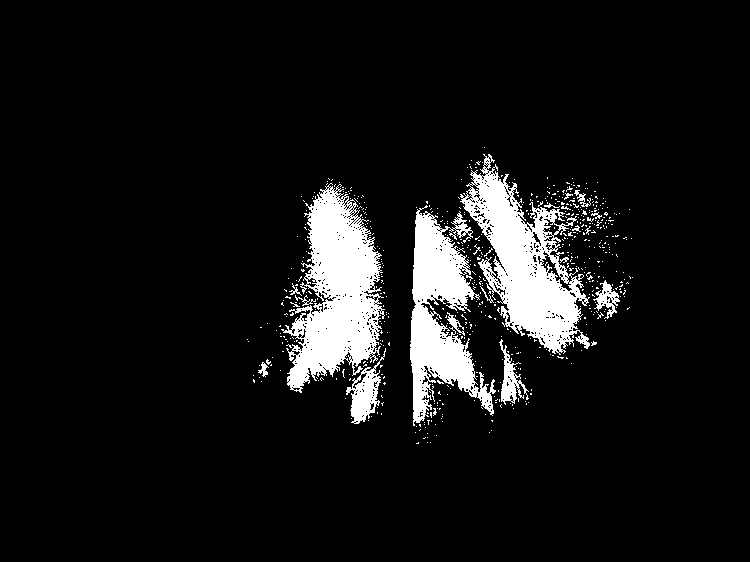

In [109]:
Image(filename='res_threshold.jpg') 

In [110]:
dirt_level = np.count_nonzero(threshold == 255) / (len(threshold) * len(threshold[0]))

if dirt_level > THRESHOLD:
    print('DIRTY')
else:
    print('CLEAN')

CLEAN
